In [1]:
from scripts.imports import *

out = Exporter(
    paths['outdir'], 
    'taxonomy'
)

In [2]:
df.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'verb',
       'verbform', 'verb_etcbc', 'verb_txt', 'clause', 'sentence', 'cl_rela',
       'domain', 'genre', 'gendom', 'cl_kind', 'PP', 'front_etcbc', 'front',
       'unmodified', 'APPO', 'DEF', 'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA',
       'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'DEMON', 'SFX1',
       'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [3]:
df.shape

(3648, 51)

# ! TODO ! : Clean these up!

In [4]:
df.function.value_counts()

simultaneous                                 1947
atelic_ext                                    576
anterior_dur                                  434
posterior                                     225
posterior_dur                                  66
habitual                                       62
begin_to_end                                   55
purposive_ext                                  34
simultaneous + atelic_ext                      24
anterior_dur_past?                             21
anterior                                       18
regular_recurrence                             18
multi_simuls                                   18
anterior_dur_purposive                         15
telic_ext                                      14
begin_to_end_habitual                           6
simul_to_end                                    6
habitual?                                       6
dist_posterior                                  6
dist_fut                                        6


## Main Function Analysis

In [5]:
main_functions = [
    'simultaneous',
    'atelic_ext',
    'telic_ext',
    'anterior_dur',
    'posterior',
    'posterior_dur',
    'habitual',
    'anterior',
    'dist_fut',
    'dist_past',
]

In [6]:
df_main = df[df.function.isin(main_functions)]

out.number(
    df_main.shape[0],
    'total_main'
)

print(df_main.shape)

(3351, 51)


In [7]:
# get a freq count
qual_ct = df_main.quality.value_counts(ascending=False)
qual_pr = (qual_ct / qual_ct.sum())
qual_pr_str = (qual_pr.round(2) * 100).astype(int).astype(str) + '%'
qual_vals = pd.concat([qual_ct, qual_pr_str], 1).T\
    .set_axis(['freq.', 'perc.'], 0)\

out.table(
    qual_vals,
    'qual_counts',
    caption='Frequencies of Primary Time Qualities'
)

qual_vals

,location,duration,sequence,iteration
freq.,1947,1076,243,62
perc.,59%,32%,7%,2%


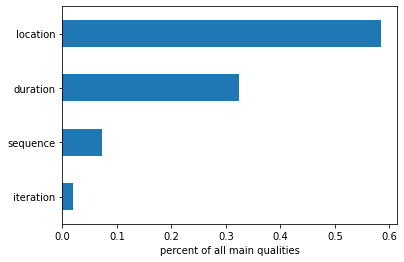

In [8]:
fig, ax = plt.subplots()
qual_pr.sort_values().plot(kind='barh', ax=ax)
ax.set_xlabel('percent of all main qualities')
out.plot(
    'bar_qual_perc',
)

In [9]:
# export numbers for each quality
for qual in qual_vals.columns:
    Nqual = qual_vals[qual]['freq.']
    Pqual = qual_vals[qual]['perc.'].replace('%', '')
    out.number(Nqual, f'N_{qual}')
    out.text(Pqual, f'P_{qual}')

In [10]:
# get a freq count
funct_ct = df_main.function.value_counts(ascending=False)
funct_pr = (funct_ct / funct_ct.sum())
funct_pr_str = (funct_pr.round(2) * 100).astype(int).astype(str) + '%'
funct_vals = pd.concat([funct_ct, funct_pr_str], 1).T\
    .set_axis(['freq.', 'perc.'], 0)\

out.table(
    funct_vals,
    'funct_counts',
    caption='Frequencies of Primary Time Functions',
    adjustbox=True,
)

funct_vals

,simultaneous,atelic_ext,anterior_dur,posterior,posterior_dur,habitual,anterior,telic_ext,dist_fut,dist_past
freq.,1947,576,434,225,66,62,18,14,6,3
perc.,57%,17%,13%,7%,2%,2%,1%,0%,0%,0%


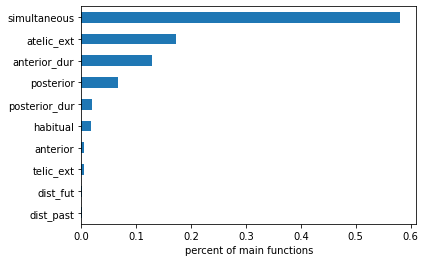

In [11]:
fig, ax = plt.subplots()
funct_pr.sort_values().plot(kind='barh', ax=ax)
ax.set_xlabel('percent of main functions')
out.plot(
    'bar_funct_perc',
)

In [12]:
top4_perc = 100*funct_pr.loc['simultaneous':'posterior'].sum()
out.number(
    top4_perc,
    'top4_perc',
)

top4_perc

94.95672933452701

In [13]:
# export numbers for each main
for funct in funct_vals.columns:
    Nfunct = funct_vals[funct]['freq.']
    Pfunct = funct_vals[funct]['perc.'].replace('%', '')
    out.number(Nfunct, f'N_{funct}')
    out.text(Pfunct, f'P_{funct}')

# Disttribution

## Genre

In [14]:
genre_ct = pd.pivot_table(
    df_main,
    index=['function'],
    columns=['genre', 'domain'],
    aggfunc='size',
    fill_value=0,
)

genre_ct

genre         instruction             list           poetry             \
domain                  ?  D   N    Q    ?  D   N  Q      ?  D  N    Q   
function                                                                 
anterior                0  0   0    0    0  0   0  0      0  0  0    3   
anterior_dur            1  1   0   54    3  0   7  1      5  0  0  111   
atelic_ext              0  4   0   65    1  0  22  0      5  1  0   80   
dist_fut                0  0   0    0    0  0   0  0      0  0  0    0   
dist_past               0  0   0    0    0  0   0  0      0  0  0    0   
habitual                0  0   1   12    3  1   4  0      0  0  0    6   
posterior               0  0   2   20    5  0  17  0      1  0  0    8   
posterior_dur           0  0   0    5    0  0   0  0      1  0  0    3   
simultaneous            3  4  14  108   11  0   5  1      9  4  1  159   
telic_ext               0  0   0    1    0  0   0  0      0  0  0    1   

genre         prophetic              prose                
domain                ?   D   N    Q     ?   D    N    Q  
function                                                  
anterior              0   0   0    1     1   3    3    7  
anterior_dur          0   1   1   66     2   3   71  107  
atelic_ext            0   3   3   46    28  16  196  106  
dist_fut              0   0   0    2     0   0    0    4  
dist_past             0   0   0    0     0   0    0    3  
habitual              0   2   1    9     0   2   13    8  
posterior             3   1   4   18     6   3  106   31  
posterior_dur         0   0   0   38     0   0    7   12  
simultaneous         47  18  39  296    53  16  456  703  
telic_ext             0   0   1    2     1   0    6    2

In [15]:
#genre_ct[:, idx[[]]]

# Export All Fronts

In [39]:
abbrevs = {
    'simultaneous': ['sim', 'Simultaneous'],
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'atelic_ext': ['atel', 'Atelic Extent'],
    'habitual': ['hab', 'Habitual'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'telic_ext': ['telic', 'Telic Extent']
}

for function, namedata in abbrevs.items():
    abbrev, full = namedata
    front_cts = pd.DataFrame(
        df_main[df_main.function == function]['front'].value_counts()
    )
    out.table(
        front_cts,
        f'{abbrev}_front',
        caption=f'Fronted Elements in {full} Phrases'
    )
    print(full)
    display(front_cts)

Simultaneous


,front
\texthebrew{ב},1081
advb,492
Ø,259
\texthebrew{ל},42
\texthebrew{כ},35
\texthebrew{אחרית}+\texthebrew{ב},15
\texthebrew{בין},7
\texthebrew{קץ}+\texthebrew{ל},5
\texthebrew{חצות},2
\texthebrew{על},2


Anterior Durative


,front
\texthebrew{עד},279
\texthebrew{ל},152
\texthebrew{ל}+\texthebrew{עד},3


Anterior


,front
\texthebrew{פנה}+\texthebrew{ל},8
\texthebrew{ל},5
advb,4
\texthebrew{מן}+\texthebrew{פנה}+\texthebrew{ל},1


Atelic Extent


,front
Ø,512
advb,55
\texthebrew{ל},5
\texthebrew{את},2
\texthebrew{כ},2


Habitual


,front
\texthebrew{ל},21
Ø,20
\texthebrew{ב},17
\texthebrew{מן},3
\texthebrew{בין},1


Posterior


,front
\texthebrew{אחר},94
advb,34
Ø,33
\texthebrew{מן},33
\texthebrew{קץ}+\texthebrew{מן},18
\texthebrew{קצה}+\texthebrew{מן},10
\texthebrew{אחר}+\texthebrew{מן},2
\texthebrew{קצת}+\texthebrew{מן},1


Posterior Durative


,front
\texthebrew{מן},63
\texthebrew{מן}+\texthebrew{ל},1
\texthebrew{ל}+\texthebrew{מן},1
\texthebrew{תחלה}+\texthebrew{מן},1


Telic Extent


,front
\texthebrew{ב},8
Ø,6


## Dist Past / Future

In [35]:
df_dist = df_main[df_main.function.isin(['dist_past', 'dist_fut'])]

In [36]:
dist_front = pd.DataFrame(df_dist.front.value_counts())

out.table(
    dist_front,
    'dist_front',
    caption='Fronted Elements in Distance Past/Future Phrases'
)

dist_front

,front
\texthebrew{ב},6
Ø,3


# Compound TAs

In [37]:
df_multi = df[df.function.str.match('.*\+')]
df_multi.shape

(50, 51)

In [38]:
multi_ct = pd.DataFrame(df_multi.function.value_counts())

out.table(
    multi_ct,
    'multi_ct',
    caption='Frequencies of Compound Adverbials'
)

multi_ct

,function
simultaneous + atelic_ext,24
posterior + atelic_ext,4
atelic_ext + simultaneous,4
habitual + begin_to_end,2
anterior_dur + duration,2
simultaneous + anterior_dist,1
reg_recurr + atelic_ext,1
simultaneous + purposive_ext,1
simultaneous + anterior,1
simultaneous + dist_posterior,1
